# Curso de Asimilación de Datos (DCAO 2019)


### Repaso de Python y Probabilidades
Los ejercicios propuestos fueron diseñados para resolverse con Python. Podría utilizarse otro lenguaje.

In [2]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt

### Ejercicio 1 - Probabilidades


Defina una función que repita n veces el lanzamiento de un dado y devuelva como resultado un vector (np.array) con los n numeros enteros obtenidos. La función debe recibir como argumento el número de repeticiones del experimento

In [3]:
def multiples_dados(n):
    result = np.zeros(n)
    for i in range(n):
        result[i] = np.random.randint(1,7)
    return result

Para el lanzamiento de un dado, definimos los siguientes eventos:

* A: Se obtiene un número menor o igual a 2

* B: Se obtiene un número mayor a 3

* C: Se obtiene un número par

**Pregunta 1**: ¿Cuál es la probabilidad de cada uno de estos sucesos?

**Pregunta 2**: ¿Cuáles de estos sucesos son excluyentes?

La definición frecuentista de probabilidad, indica que podemos establecer la probabilidad empírica de un evento aleatorio mediante la observación de resultados tras repetir muchas veces un experimento aleatorio. La probabilidad empírica de un evento será el número de veces en los que el experimento arrojó como resultado al evento en cuestión, divido la cantidad de veces en las que repetimos el experimento.

Utilizando la función _multiples_dados_ definida anteriormente, calcule la probabilidad empírica del suceso A. Verifique con los resultados teóricos.

In [4]:
proba = 0
reps = 500
res = multiples_dados(reps)
for ires in res:
    if ires<=2:
        proba += 1
proba = proba/reps
print(proba)

0.336


¿Cuántas veces repitió el experimento? Realice un gráfico sencillo mostrando cómo varía la probabilidad de cada suceso, en función del número de repeticiones. 

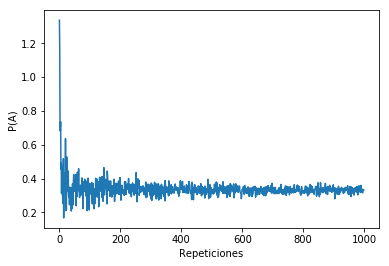

In [5]:
nreps = 1000
proba_vec = np.zeros(nreps)
for reps in range(1,nreps+1):
    res = multiples_dados(reps)
    for ires in res:
        if ires<=2:
            proba += 1
    proba = proba/reps
    proba_vec[reps-1] = proba

plt.plot(proba_vec)
plt.xlabel("Repeticiones");
plt.ylabel("P(A)");

* Verifique empíricamente que los sucesos A y C son independientes. 
* Verifique empíricamente que los seucesos B y C no son independientes

Compare con los resultados de la Pregunta 2

In [6]:
# Calcular probabilidad de C
proba = 0
probc = 0
probayc = 0
reps = 500
res = multiples_dados(reps)
for ires in res:
    if ires<=2:
        proba += 1
    if ires%2==0:
        probc += 1
    if ires==2:
        probayc += 1
proba = proba/reps
probc = probc/reps
probayc = probayc/reps

print("P(A,C)=",probayc)
print("P(A)P(C)=",proba*probc)

P(A,C)= 0.172
P(A)P(C)= 0.162


### Ejercicio 2 - Funciones de densidad
El tiempo (en segundos) que demoramos en conectarnos a un servidor de cómputo es una r.v. X. 
El tiempo (en segundos) que demoramos en conectarnos y autenticarnos a un servidor de cómputo es una r.v. Y

La función de densidad conjunta está dada por 

$𝑝(𝑥,𝑦)=6\cdot10^{−6}\cdot e^{(−𝑥−2𝑦)}$, para    $0<𝑥<𝑦$

¿Cuál es la probabilidad de que el tiempo de espera de conexión (X) sea menor a 2 segundos y el tiempo total (X) sea menor a 2 segundos?

¿Cuál es la probabilidad de que el tiempo de espera de conexión (X) sea mayor a 2 segundos?

### Ejercicio 3 - Distribución Normal y Teorema de Bayes

Utilizando las funciones provistas por numpy, genere muestras aleatorias de la distribución $\mathcal{N}(5,2^2)$. 

Evalúe la evolución de la media muestral y la varianza muestral en función del tamaño de la muestra, hasta n=50. (Guardar esta última muestra en un vector para utilizar más adelante).

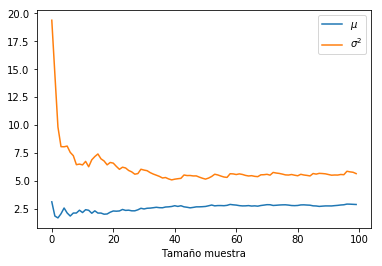

In [7]:
nsamples = 100
sample = np.zeros(nsamples)
s_meanv = np.zeros(nsamples)
s_varv = np.zeros(nsamples)

for i in range(2,nsamples+2):
    x = np.random.normal(3,2)
    sample[i-2] = x
    s_meanv[i-2] = np.sum(sample[0:i])/i
    s_varv[i-2] = (1/(i-1))*np.sum( (sample[0:i]-s_meanv[i-2])**2)
    
plt.plot(s_meanv,label="$\mu$")
plt.plot(s_varv,label="$\sigma^2$")
plt.xlabel("Tamaño muestra");
plt.legend();

Grafique los resultados en un histograma 
(Puede utilizar la función _plt.hist_)

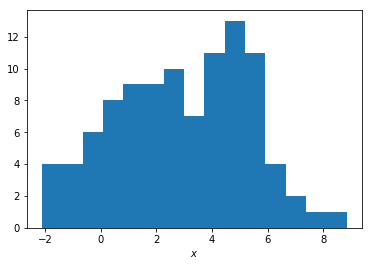

In [8]:
xx = np.linspace(-5,5,100)
plt.hist(sample,bins=15);
plt.xlabel("$x$");

La función de densidad de probabilidad para una variable aleatoria Gaussiana es:
$$ p(x) = \frac{1}{\sigma\sqrt{2 \pi}} e^{-\frac{(x-\mu)^2}{2 \sigma^2}} \,  $$

Escriba una función que devuelva el valor de $p(x)$ a partir de x

In [9]:
def pdf_norm(x,mu,s):
    # Calculate Gaussian pdf with mean mu and std. deviation s
    pdf = 1/(2*np.pi)**0.5/s*np.exp(-0.5*(x-mu)**2/s**2)
    return pdf

Grafique las siguientes funciones de densidad:
1. $p(x) = \mathcal{N}(-2,\sigma_b^2)$
2. $p(y|x)= \mathcal{N}(1,\sigma_o^2)$

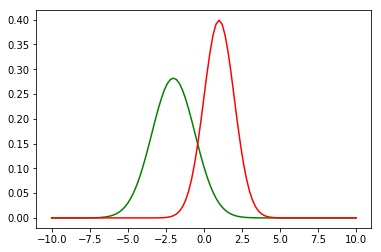

In [10]:
N  = 101                     # Nro. puntos de grilla
xx = np.linspace(-10,10,N)   # Grilla regular
dx = xx[1]-xx[0]
sigma_b = np.sqrt(2)
sigma_o = 1
px = pdf_norm(xx,-2,sigma_b)
pyx = pdf_norm(xx,1,sigma_o)
plt.figure()
plt.plot(xx,px,'green')
plt.plot(xx,pyx,'red')

Computacionalmente, utilizaremos las representaciones discretas de las funciones de densidad en la grilla definida por la variable xx. Realizaremos operaciones entre las pdfs utilizando productos y divisiones punto-a-punto en la grilla.   

Podríamos inferir la distribución posterior $p(x|y)$ utilizando el teorema de Bayes:
$$ p(x|y) = \frac{p(x) \, p(y|x)}{p(y)}$$

Para esto necesitamos calcular la pdf del denomidador. Esta densidad $p(y)$ no depende de x, por lo que su valor es una constante. De hecho, actúa como un factor de normalización. Halle dicho valor. (Ayuda: Pensar a $p(y)$ como una pdf marginalizada, adaptando estos datos a nuestro contexto de grilla.)

In [11]:
py = sum(px*pyx)*dx;

Calcule finalmente $p(x|y)$ y grafique las tres funciones de densidad. Guardar la figura a un archivo.

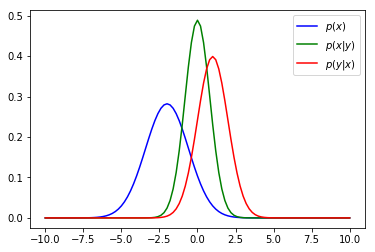

In [12]:
pxy = pyx*px/py
plt.figure()
plt.plot(xx,px,'blue',label="$p(x)$");
plt.plot(xx,pxy,'green',label="$p(x|y)$");
plt.plot(xx,pyx,'red',label="$p(y|x)$");
plt.legend();

Analizar y comparar qué ocurre al  aumentar o reducir los valores de  $\sigma_o$. ¿Que ocurre para valores sumamente altos/pequeños de $\sigma_o$. ¿Ocurrirá algo similar al modificar $\sigma_b$? 

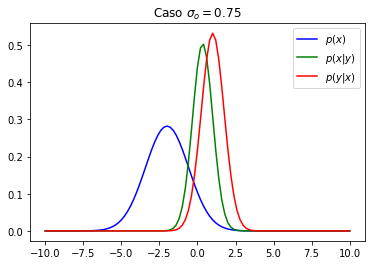

In [13]:
#Caso 2 
px = pdf_norm(xx,-2,sigma_b)
pyx = pdf_norm(xx,1,0.75)
pxy = pyx*px/py
plt.figure()
plt.plot(xx,px,'blue',label="$p(x)$");
plt.plot(xx,pxy,'green',label="$p(x|y)$");
plt.plot(xx,pyx,'red',label="$p(y|x)$");
plt.title("Caso $\sigma_o=0.75$")
plt.legend();

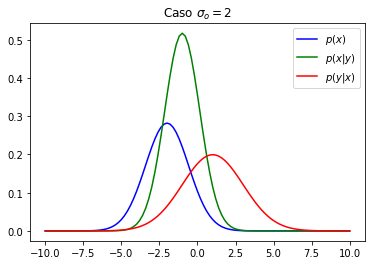

In [14]:
#Caso 3 
px = pdf_norm(xx,-2,sigma_b)
pyx = pdf_norm(xx,1,2)
pxy = pyx*px/py
plt.figure()
plt.plot(xx,px,'blue',label="$p(x)$");
plt.plot(xx,pxy,'green',label="$p(x|y)$");
plt.plot(xx,pyx,'red',label="$p(y|x)$");
plt.title("Caso $\sigma_o=2$")
plt.legend();

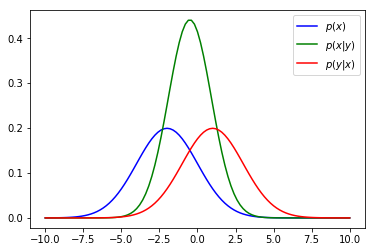

In [15]:
#Caso 3 
px = pdf_norm(xx,-2,sigma_b**2)
pyx = pdf_norm(xx,1,sigma_b**2)
pxy = pyx*px/py
plt.figure()
plt.plot(xx,px,'blue',label="$p(x)$");
plt.plot(xx,pxy,'green',label="$p(x|y)$");
plt.plot(xx,pyx,'red',label="$p(y|x)$");
plt.legend();

### Ejercicio 4 - Distribución Gaussiana multivariada

Tenemos un vector aleatoria $X\in R^3$, con distribución Gaussiana centrada (i.e. media cero) y covarianza Q,
$$Q=
\begin{bmatrix}
4 &2  &-1 \\ 
 2& 4 &0 \\ 
 -1&  0&2 
\end{bmatrix}
$$

**Pregunta 1:** ¿Que podemos decir acerca de la variabilidad de  cada una de las variables de $X$?

Podemos verificar realizando scatter plots de una muestra aleatoria de la distribución.

Para las variables $X_1$ y $X_2$, que ocurre con la muestra si la covarianza entre estas variables aumenta o disminuye mucho?

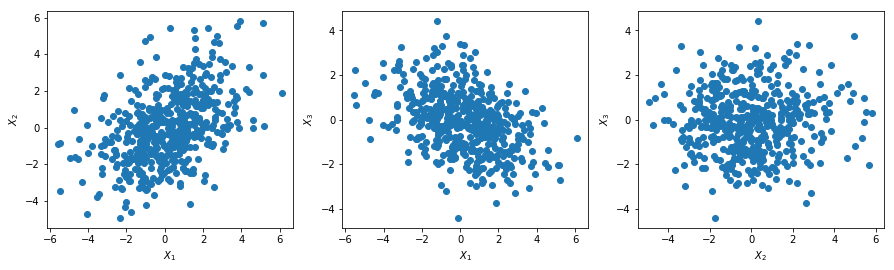

In [16]:
Q = [[4,2,-1],[2,4,0],[-1,0,2]]
msample = np.random.multivariate_normal(np.zeros(3),Q,size=500)
fig = plt.figure(figsize=[15,4])

plt.subplot(1, 3, 1)
plt.scatter(msample[:,0], msample[:,1])
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")

plt.subplot(1, 3, 2)
plt.scatter(msample[:,0], msample[:,2])
plt.xlabel("$X_1$")
plt.ylabel("$X_3$")

plt.subplot(1, 3, 3)
plt.scatter(msample[:,1], msample[:,2])
plt.xlabel("$X_2$")
plt.ylabel("$X_3$");



Sea $Z\in R^8$ una variable aleatoria con distribución Gaussiana, $Z\sim \mathcal{N}(0,4I)$ 

* Genere una muestra aleatoria de $Z$ con 100 elementos. 
* Calcule la covarianza empírica de la muestra y repita el experimento hasta que la matriz de covarianza obtenida sea similar a la covarianza teórica de $Z$.  ¿Que tamaño de muestra seleccionó?

In [17]:
import pandas as pd

z_sample = np.random.multivariate_normal(np.zeros(8),4*np.eye(8),size=30)
Q_emp = np.cov(z_sample.T)
pd.DataFrame(Q_emp)

,0,1,2,3,4,5,6,7
0,4.391851,-1.161823,1.427226,-0.700829,0.102537,-0.637999,-0.742264,0.350321
1,-1.161823,4.563710,-1.294015,0.113831,-0.758736,0.499585,-0.383565,-1.077400
2,1.427226,-1.294015,3.865241,-0.826207,0.647636,-0.909689,-0.087480,0.418088
3,-0.700829,0.113831,-0.826207,3.017994,-0.163377,1.013209,-0.124391,0.075932
4,0.102537,-0.758736,0.647636,-0.163377,3.343195,-0.368215,-0.347009,-0.340031
5,-0.637999,0.499585,-0.909689,1.013209,-0.368215,2.706845,0.930482,1.015397
6,-0.742264,-0.383565,-0.087480,-0.124391,-0.347009,0.930482,3.306461,0.727333
7,0.350321,-1.077400,0.418088,0.075932,-0.340031,1.015397,0.727333,2.435607


### Modelos Autorregresivos

Un tipo de proceso estocástico Markoviano es el modelo AR(1) o autorregresivo de orden 1.


\begin{cases} X(t_1) = 0 \\ X(t_i)=\alpha X(t_{i-1})+\epsilon(t_i), \quad 0<|\alpha|<1, \quad i=2,3,...,T \end{cases}

Donde $\epsilon(t_i)\sim \mathcal{N}(0,\sigma^2)$ es un proceso de ruido blanco Gaussiano


Una realización de este proceso estocástico es una caminata aleatoria.

* Codificar una función _proc_ar_1_ que devuelva una realización de este proceso durante _T_ pasos de tiempo. La función debe recibir  los parámetros $\alpha$ y $\sigma$.

* Generar una serie de tiempo para T=500 pasos de tiempo usando parámetros $\alpha=0.95$ y $\sigma=1$. Evalúe combinaciones de estos parámetros con $\alpha=0.5$  y $\sigma=0.1$. ¿Qué efecto tiene el parámetro $\alpha$?

In [18]:
def proc_ar_1(T,alpha,s):
    vec = np.zeros(T)
    for t in range(1,T):
        vec[t] = alpha*vec[t-1] + np.random.normal(0,s)
    return vec

* Generar una serie de tiempo para T=500 pasos de tiempo usando parámetros $\alpha=0.95$ y $\sigma=1$. Evalúe combinaciones de estos parámetros con $\alpha=0.5$  y $\sigma=0.1$. ¿Qué efecto tiene el parámetro $\alpha$?

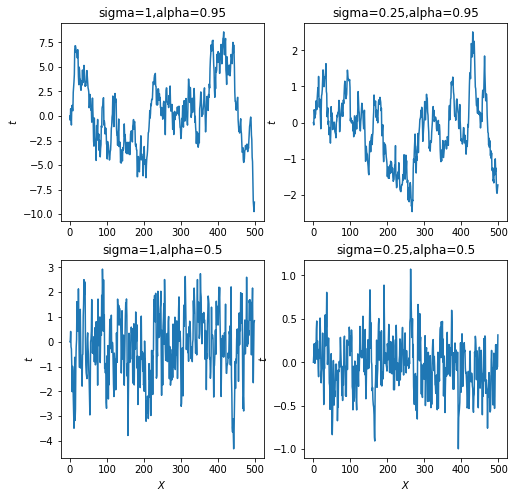

In [19]:
fig = plt.figure(figsize=[8,8])

plt.subplot(2, 2, 1)
plt.plot(proc_ar_1(500,0.95,1))
plt.ylabel("$t$")
plt.title("sigma=1,alpha=0.95")
         
plt.subplot(2, 2, 2)
plt.plot(proc_ar_1(500,0.95,0.25))
plt.ylabel("$t$")
plt.title("sigma=0.25,alpha=0.95")

plt.subplot(2, 2, 3)
plt.plot(proc_ar_1(500,0.65,1))
plt.xlabel("$X$")
plt.ylabel("$t$")
plt.title("sigma=1,alpha=0.5")

plt.subplot(2, 2, 4)
plt.plot(proc_ar_1(500,0.65,0.25))
plt.xlabel("$X$")
plt.ylabel("$t$")
plt.title("sigma=0.25,alpha=0.5");

* Realizar N=5000 simulaciones durante T=100 pasos de tiempo. Verificar empíricamente que la esperanza del proceso tiende a cero para cualquier instante de tiempo $t_i$

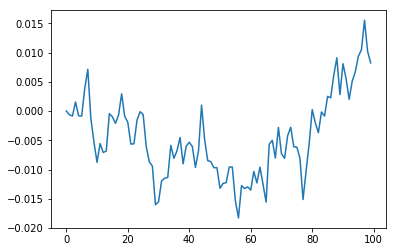

In [20]:
nt = 100
nsamples=5000
procs = np.zeros([nt,nsamples])
nmeans = np.zeros(nsamples)
for i in range(nsamples):
    procs[:,i] = proc_ar_1(nt,0.95,0.25)

plt.figure()
plt.plot(np.mean(procs,1));

En ecuación dinámica de las variables de estado dada por $ X(t_i) = M (X(t_{i-1})) + w(t_i) $,

¿Qué carácteristicas de los errores estaríamos tratando de reproducir si usásemos un modelo AR(1) en lugar de un ruido blanco Gaussiano para $w(t_i)$?

### Modelo Lorenz 63 
(Proveer codigo)
Dadas unas CI y parametros fijos.

* Plotear la evolución de dos de las variables

* Volver a integrar el modelo 5 veces perturbando levemente la condición inicial. ¿Existen regiones del espacio en los que el estado del es más predecible?

* Rehacer la simulación N veces usando la condicion inicial real pero perturbando levemente los parámetros

* Grafique el error medio del ensamble como función del tiempo

* Podemos eliminar las divergencias reduciendo el timestep?

* Deseamos asimilar las variables del modelo de Lorenz pero sólo podemos observar dos variables: $z$ y $x+y$. ¿Qué forma tendrá el operado de observación $\mathbf{H}$?